In [1]:
from Whispi.Backtest.Strategies.strategy_meta import StrategyMeta

class BigJumpAndAfterGrowth(StrategyMeta):
    params = (
        ('jump_size', 2),
        ('period_after_jump', 30),
    )
        
    def buy_signal(self):
        return self.data.close[0] >  self.data.close[-1]*(1 + self.params.jump_size/100)

    def close_signal(self):
        return len(self) >= (self.bar_executed + self.params.period_after_jump)
    
    def notify_order(self, order):
        if order.status == order.Completed:
            self.bar_executed = len(self)

        if not order.alive():
            self.order = None 
            
    def next(self):
        if self.order:
            return  # pending order execution

        if not self.position:  # not in the market
            if self.buy_signal():
                self.order = self.buy()

        else:  # in the market
            if self.close_signal():
                self.close()  # stop met - get out

C:\ProgramData\Anaconda3\envs\TestLibraries\lib\site-packages\finrudatasets\Source\ohlc.py:159: UserWarning: MoexInfo currency set to RUB for FXUS
  warnings.warn("MoexInfo currency set to RUB for " +self.ticket)


<IPython.core.display.Javascript object>


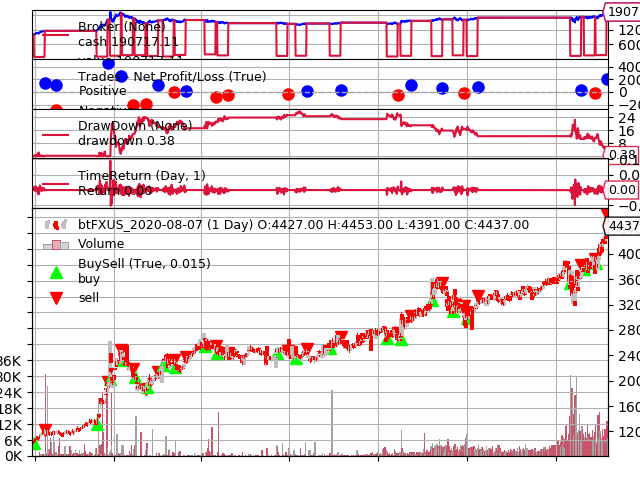

                                       0
sharperatio                     0.148043
worst                         -0.0970369
best                            0.552074
nochange                               0
negative                               1
positive                               7
stddev                          0.183127
average                        0.0971107
rnorm100                         10.4628
rnorm                           0.104628
ravg                         0.000394875
rtot                            0.645621
2020                            0.135753
2019                           0.0429526
2018                           0.0892606
2017                            0.032497
2016                          -0.0970369
2015                           0.0110651
2014                            0.552074
2013                           0.0103206
trades                                21
sqn                              1.39546
period_after_jump                     30
jump_size       

In [2]:
from Whispi.Backtest.Runners.bt_case_run import *

k = BtRunCase(strategy=BigJumpAndAfterGrowth, ticket='FXUS')

In [ ]:
from Whispi.Backtest.Runners.bt_strategy_opt import *

k = BtRunOpt(strategy=BigJumpAndAfterGrowth, ticket = 'FXUS',
             jump_size=range(1, 10, 1),
             period_after_jump = range(1, 90, 1)
             )

In [4]:
display(k.data.iloc[0, :])

m_sharperatio                       0.562818
m_rnorm100                           23.8192
m_rnorm                             0.238192
m_ravg                           0.000847826
m_rtot                               1.38619
m_2020                              0.154331
m_2019                              0.131413
m_2018                              0.218244
m_2017                              0.207796
m_2016                             -0.137205
m_2015                              0.297008
m_2014                                0.8005
m_2013                             0.0329848
m_trades                                  17
m_sqn                                 2.6341
p_jump_size                                1
p_period_after_jump                       81
strategy               BigJumpAndAfterGrowth
ticket                                  FXUS
Name: 80, dtype: object